<a href="https://colab.research.google.com/github/rajsecrets/PyTorch-Tutorial/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow
let's code an example pytorch end to end workflow

In [1]:
what_we_are_covering = {1: "data(prepare and load)",
                        2: "build model",
                        3: "fitting the model to data(training)",
                        4: "making predictions and evaluating a model (inferences)",
                        5: "saving and loading the model",
                        6: "putting it all together"}
what_we_are_covering, print("this is dictionary")

this is dictionary


({1: 'data(prepare and load)',
  2: 'build model',
  3: 'fitting the model to data(training)',
  4: 'making predictions and evaluating a model (inferences)',
  5: 'saving and loading the model',
  6: 'putting it all together'},
 None)

In [2]:
import torch
from torch import nn #nn contains all of the pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check the pytorh version
torch.__version__

'2.1.0+cu118'

# Data (preparing and loading)
Data can be anything in machine learning
* Excel spreadsheet
* image
* video
* text
* DNA
* Song

Machine learning is a game of two parts:
1. Get data into a numbers
2. find or build the model to learn the patterns in the numbers

To showcase this, let's create some known data using the linear regression formula.

we will use a linear regression formula to make a st. line with known parameters.

In [3]:
# create *known* parameter
# y = mx + c

weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X =  torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight*X +  bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:

len(y)

50

In [5]:
len(X)

50

In [6]:





len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts)

Let's create training and testing set data

In [7]:

# create a train/test split
train_split = int(0.8* len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How we can visualise the data ?
- Matlplotlib

In [8]:
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots training data , test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #plot the traning data in blue
  plt.scatter(train_data, train_labels,c="b", s = 4, label ='training data ')


  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="testing data")

# are there predictions

  if predictions is not None:
  #plot the predictions if they exist
    plt.scatter(test_data, predictions, c = "r", label= "predictions")

  #show the legend
  plt.legend(prop={"size":14});


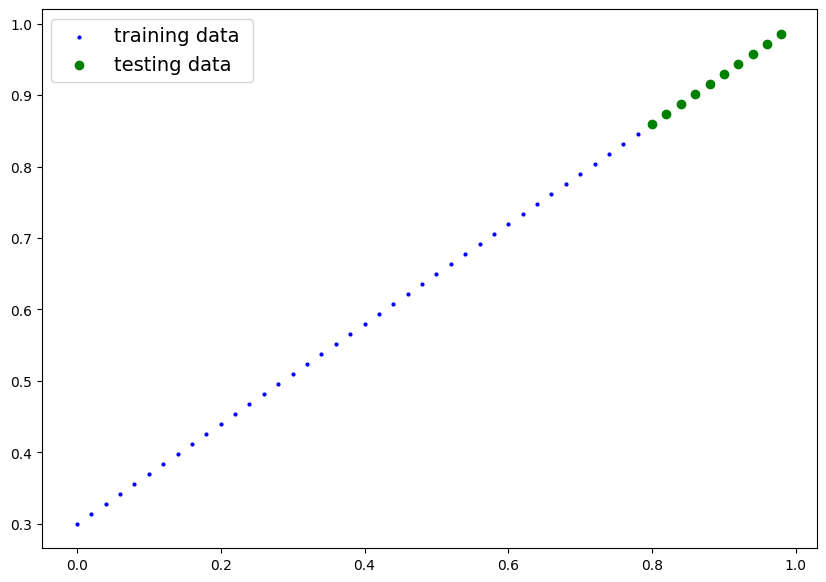

In [9]:
plot_predictions();


# 2. Build Model
Our first PyTorch model..


This is very exciting... let's do it

- learn OOPs in python

What our model does :
* start with random values(weights and bias)
* Look at training data and adjust the random values

How does it do so ?


By two main algorithms...
1. Gradient Descent
2. Backpropagation

In [10]:
# Create linear regression model class
# nn(module) is the building block for neural networks and as we are making the neural networks so we need it now.
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))

    #Forward method to define the computational in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data here
    return self.weights *x + self.bias  # linear regression formula




###  Pytorch model essentials

* torch.nn - contains all of the computational graphs (a neural network can be considered as a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn , often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules , if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in Pytorch live, they help with gradient descent
* def forward() - All nn.module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


### 1. for loading dataset
* torchvision.transforms
* torch.utils.data.Dataset
* torch.utils.data.Dataloader

### 2. for picking a pretrained model
* torch.nn
* torch.nn.module
* torchvision.models

### 3. for optimisation
* torch.optim

### 4. Evaluation of model
* torchmetrics

### 5. Improve through experimentation
* torch.utils.tensorboard




In [11]:
# create random seed
torch.manual_seed(42)

 # Create an instance of the model (this the subclass of nn.module)
model_0= LinearRegressionModel()

 #check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]


### for stopping the randomness
from torch.random import manual_seed

torch.manual_seed()


In [12]:
# List the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_model()`

to check our model's predictive power, let's see how well it predicts `y_test` based on 'X_test'.

when we pass data through our model, it's going to run it through the `forward()` method.

In [13]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [14]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

Not good predictions

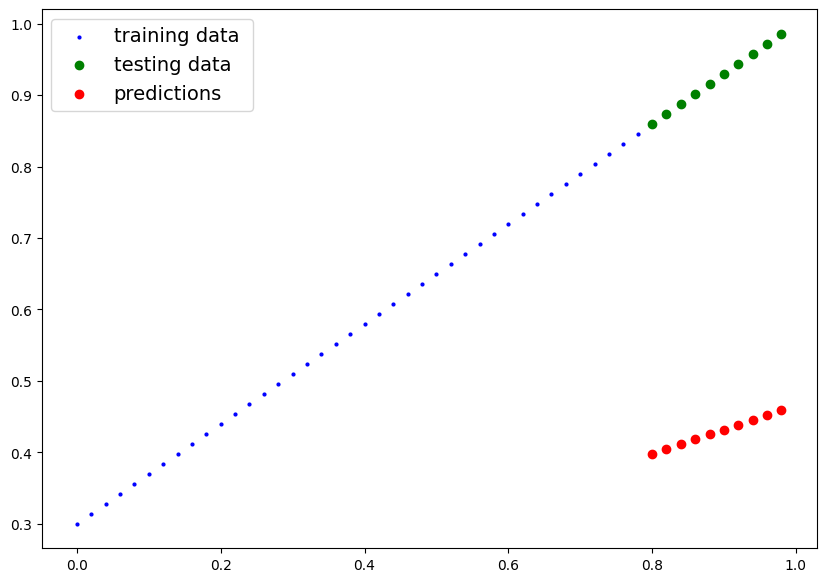

In [16]:
plot_predictions(predictions=y_preds)

In [17]:
# with torch.no_grad():
#   y_pred = model_0(X_test)

# y_pred

Conclusion -- we will use inference for prediction

## 3. Train model
why ?

To move from unknown parameters to known

To see how much our model is predicting wrong , we use `loss function`

* **Loss function:** a mathematical function for measuring how much model is predicting wrt ideal outputs.

* **Optimizer:**  Note the loss of the model and adjust the parameters(weights and bias)
   * inside optimizer we get two parameters :
   1. params : the model parameters i would like to optimize, Ex. - `params=model_0.parameters()
   2. lr (learning rate) : how much steps the optimizer should take

specially for pytorch we need:
* a training loop
* a testing loop


In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
# check our model's parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
# method 1 for finding the MAE loss
MAE_loss = torch.mean(torch.abs(y_preds-y_test))
MAE_loss

tensor(0.4945)

In [21]:
# setup the loss function
loss_fn = nn.L1Loss()

# setup the optimizer(stochastic gradient descent)
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr=0.0001 ) #lr - learning rate

Q. Which loss function and optimizer i should use ?

A: conditoinal , problem specific.

Ex: regression problem (like ours)

    -> loss function - `nn.L1Loss()`                                 
                                   
    -> optimizer - `torch.optim.SGD()`

  But for classification problems we use binary cross entropy loss - `nn.BCELoss`

### Building a training loop and testing loop in PyTorch

A. A couple of things we need in training loop
0. Loop through data
1. Forward pass ( data moving through our model's `forward()` functions) to make predictions on data - is called **forward propagation**
2. calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backwards through the network to calcualte the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss(**gradient descent**)


In [22]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [23]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.numpy())
            test_loss_values.append(test_loss.numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.4944015145301819
Epoch: 10 | MAE Train Loss: 0.31172919273376465 | MAE Test Loss: 0.49305421113967896
Epoch: 20 | MAE Train Loss: 0.31057703495025635 | MAE Test Loss: 0.4917070269584656
Epoch: 30 | MAE Train Loss: 0.30942484736442566 | MAE Test Loss: 0.4903597831726074
Epoch: 40 | MAE Train Loss: 0.30827268958091736 | MAE Test Loss: 0.48901262879371643
Epoch: 50 | MAE Train Loss: 0.30712056159973145 | MAE Test Loss: 0.4876653552055359
Epoch: 60 | MAE Train Loss: 0.30596840381622314 | MAE Test Loss: 0.4863181710243225
Epoch: 70 | MAE Train Loss: 0.30481624603271484 | MAE Test Loss: 0.48497089743614197
Epoch: 80 | MAE Train Loss: 0.30366405844688416 | MAE Test Loss: 0.483623743057251
Epoch: 90 | MAE Train Loss: 0.30251190066337585 | MAE Test Loss: 0.4822765290737152


In [24]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

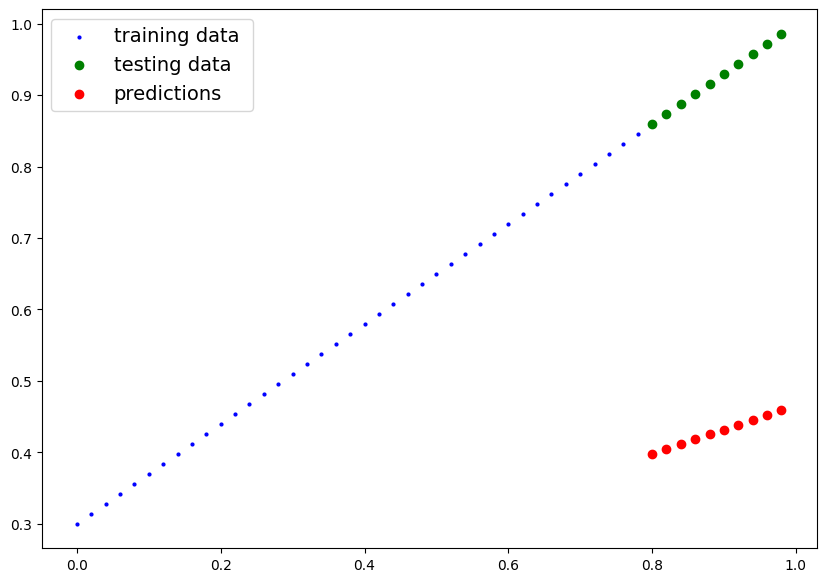

In [25]:
plot_predictions(predictions=y_preds)

😒😒😒 TOO MUCH INCORRECT PREDICTIONS , WE WILL TAKE REVENGE

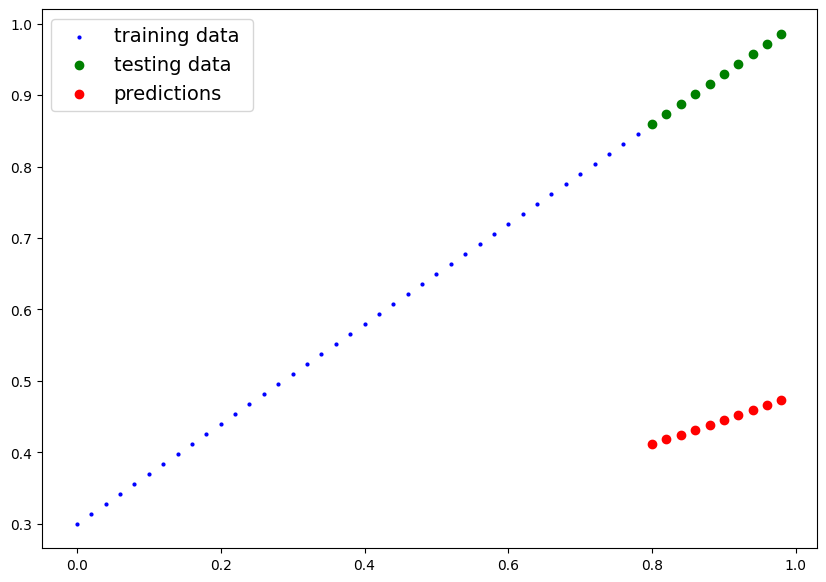

In [26]:
plot_predictions(predictions=y_preds_new)

WOW! 😊😊 WE GOT EXACT PREDICTION AS THE OUTPUT , IF EPOCHS WILL BE 200

In [27]:
import numpy as np

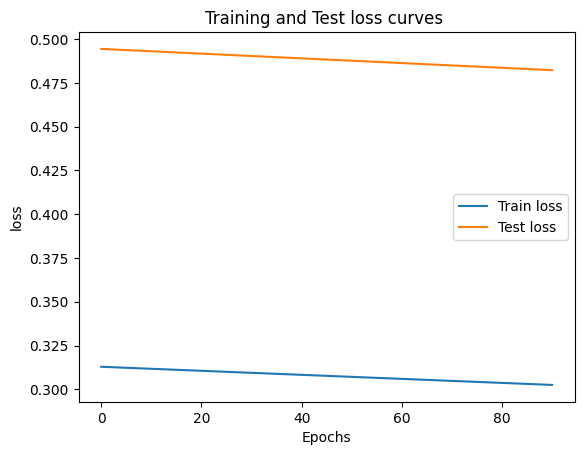

In [28]:
# We will plot the loss curves
plt.plot(epoch_count, train_loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label ="Test loss")
plt.title("Training and Test loss curves ")
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend();

# Saving and Loading a model in PyTorch

Three main methods:

1. `torch.save()` - Save the model in Pickel format

2. `torch.load()` - Load the model

3. `torch.nn.Module.load_state_dict()` - load a model's saved state dictionary



## Saving the model

In [29]:
# saving model
from pathlib import Path

# 1. Create models Directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME="01_Pytorch_workfrow_model_0.pt"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"saving model to: {MODEL_PATH}")
torch.save(obj=model_0.state_dict(),
           f = MODEL_SAVE_PATH)

saving model to: models


In [30]:
# To check in the folder like ubuntu
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Nov 19 11:52 01_Pytorch_workfrow_model_0.pt


## Loading the saved model


In [31]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [32]:
# to load the save state_dict
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [33]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [34]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.4113],
        [0.4181],
        [0.4249],
        [0.4317],
        [0.4385],
        [0.4453],
        [0.4522],
        [0.4590],
        [0.4658],
        [0.4726]])

In [35]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.4113],
        [0.4181],
        [0.4249],
        [0.4317],
        [0.4385],
        [0.4453],
        [0.4522],
        [0.4590],
        [0.4658],
        [0.4726]])

In [36]:
# Compare with original model
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

How and why this happened i don't know !!!

#6. Putting all together

apply whatever we learnt

In [37]:
#Import Pytorch, nn and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check pytorch version
torch.__version__

'2.1.0+cu118'

Create device-agnostic code

Means if there is GPU available then use it or use CPU

In [38]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

Create some data using the linear regression formula : y = mx + c


m = weight,
c = bias

In [39]:
# Deciding the weight and bias
m = 0.7 #weight
c = 0.3 #bias

#Create arange values
start=0
end=1
step=0.02

#Create x and y (features and labels)
x= torch.arange(start, end, step).unsqueeze(dim=1)
y= m*x+c

In [40]:
x[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [41]:
# Splitting the data
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:],y[train_split:]
len(x_train), len(y_train) , len(x_test) , len(y_test)

(40, 40, 10, 10)

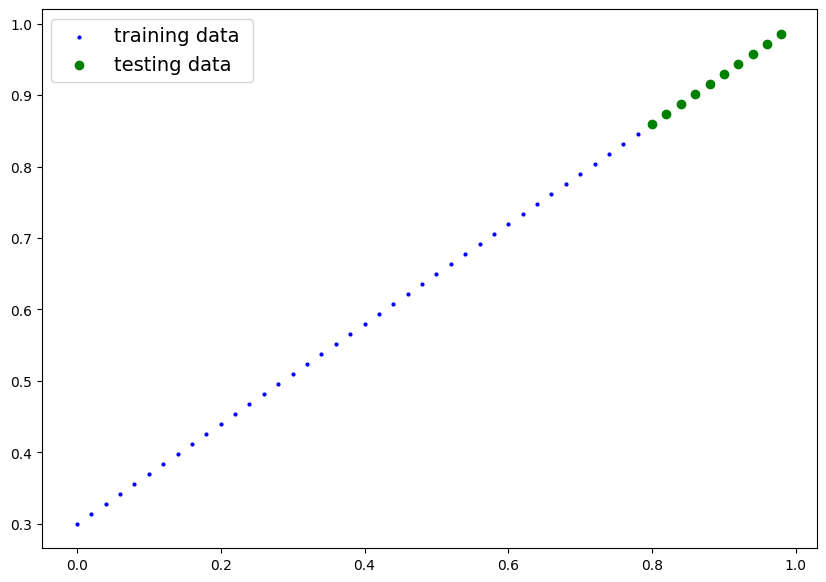

In [42]:
# Plot the data

plot_predictions(x_train, y_train, x_test, y_test)

### 6.2 Building a pytorch linear regression model

In [43]:
# Create a linear model by subclassing the model parameters
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [44]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [45]:
# Set the model to the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [46]:
# Models parameter
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

27 oct 2023


###6.3 Training

for training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [47]:
# setup the loss function
loss_fn = nn.L1Loss() #same as MAE

#Setup our optimizer
optimizer= torch.optim.SGD(params=model_1.parameters(),
                           lr = 0.01)

In [48]:
# let's write a training loop
torch.manual_seed(42)

epochs = 500

# put the data on the target device (device agnostic code for data)
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)


for epoch in range (epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(x_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform dackpropagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(x_test)

    test_loss = loss_fn(test_pred, y_test)


  # print out what's happening

  if epoch & 10 == 0 :
    print(f"epoch: {epoch} | loss ; {loss} | test loss : {test_loss}")

epoch: 0 | loss ; 0.5551779866218567 | test loss : 0.5739762187004089
epoch: 1 | loss ; 0.5436570048332214 | test loss : 0.560505211353302
epoch: 4 | loss ; 0.5090939998626709 | test loss : 0.5200923085212708
epoch: 5 | loss ; 0.49757298827171326 | test loss : 0.5066213011741638
epoch: 16 | loss ; 0.3708421289920807 | test loss : 0.35844048857688904
epoch: 17 | loss ; 0.35932111740112305 | test loss : 0.3449695110321045
epoch: 20 | loss ; 0.3247582018375397 | test loss : 0.30455657839775085
epoch: 21 | loss ; 0.31323719024658203 | test loss : 0.2910855710506439
epoch: 32 | loss ; 0.18650634586811066 | test loss : 0.14290474355220795
epoch: 33 | loss ; 0.1749853491783142 | test loss : 0.1294337660074234
epoch: 36 | loss ; 0.14042238891124725 | test loss : 0.08902084082365036
epoch: 37 | loss ; 0.128901407122612 | test loss : 0.07554984837770462
epoch: 48 | loss ; 0.025835609063506126 | test loss : 0.044442154467105865
epoch: 49 | loss ; 0.02469830960035324 | test loss : 0.04686365649104

In [49]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [50]:
weight, bias

(0.7, 0.3)

its very close to the original weight and bias

### 6.4 Making and Evaluating the Predictions

In [51]:
# turn the model into evaluation mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(x_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

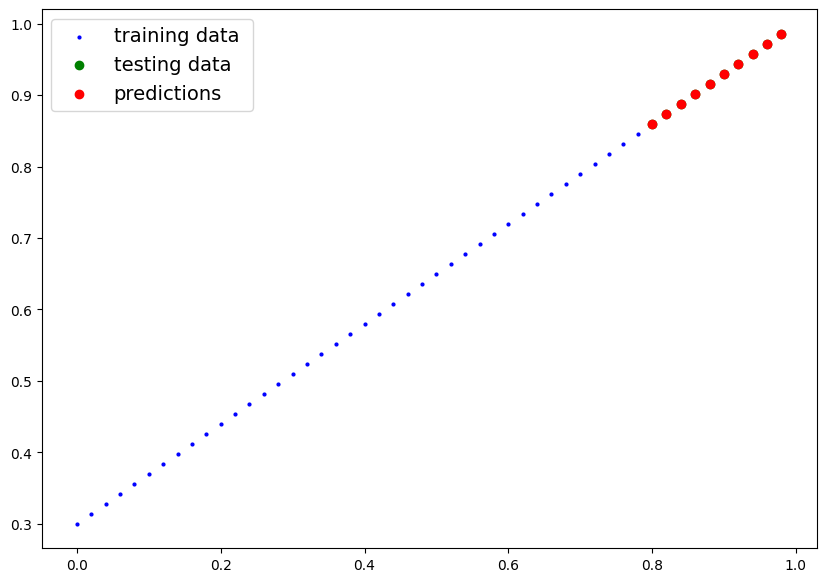

In [52]:
# check out out model predictions visually
plot_predictions(predictions= y_preds.cpu())

### 6.5 saving and loading a trained model

In [53]:
# saving model
from pathlib import Path

# 1. Create models Directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME="01_Pytorch_workfrow_model_1.pt"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"saving model to: {MODEL_PATH}")
torch.save(obj=model_1.state_dict(),
           f = MODEL_SAVE_PATH)

saving model to: models


In [55]:
# load a pytorch model

# create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

 # put the loaded model to device
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [58]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [59]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [60]:
# Evaluate loaded model
# put the model on evaluation mode
loaded_model_1.eval()

# inferencing from the model
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(x_test)

# comparing the final predictions from model to the original output
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises and extra-curriculum

https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras